# CHURN DATA ANALYSIS

## Importing all the necessary modules

In [668]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [669]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

## Importing the data from an external source into the Python environment

In [670]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [671]:
data.shape

(10000, 14)

In [672]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**According to the Naming Conversion the variables are following the rules.**

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Duplicacy Treatment

In [674]:
data.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68  

In [675]:
data.duplicated().sum()

0

**There is no duplicate values in the data.**

## Missing Values Treatment

In [676]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**There is no missing values in the data**

## checking the value count and nunique of categorical variable

In [677]:
data.Surname.value_counts()

Surname
Tien                       36
Chiu                       33
Tsui                       32
Smith                      32
Chang                      31
Tang                       30
Tsao                       29
Chin                       29
Martin                     29
Scott                      29
Walker                     28
Kung                       28
Pan                        27
Brown                      26
Cheng                      26
Chien                      25
Shih                       25
Yeh                        25
Genovese                   25
Maclean                    24
Peng                       24
Wright                     24
Tao                        24
Fanucci                    23
Ma                         23
White                      23
Wilson                     23
Wang                       22
Moore                      22
Lu                         22
Tsai                       22
Johnson                    22
Chu                        22
Mc

In [678]:
data.Surname.nunique()

2917

In [679]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [680]:
data.Geography.nunique()

3

In [681]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [682]:
data.Gender.nunique()

2

In [683]:
data.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [684]:
data.HasCrCard.nunique()

2

In [685]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [686]:
data.Exited.nunique()

2

In [687]:
data.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [688]:
data.IsActiveMember.nunique() 

2

### comparison of Geography

<Axes: xlabel='Geography'>

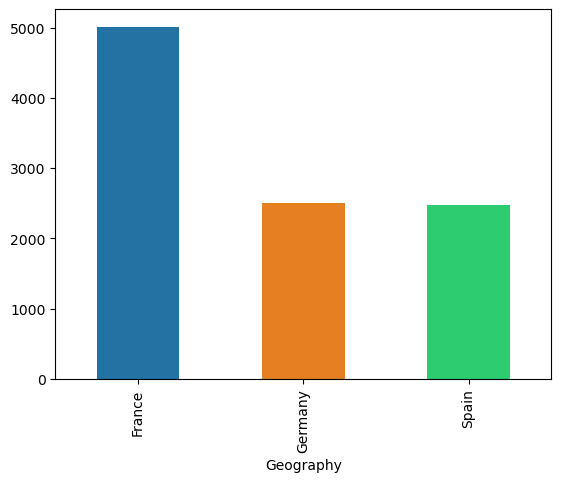

In [689]:
data['Geography'].value_counts().plot(kind='bar',color=['#2471A3','#E67E22','#2ECC71'])

### Distribution of Customer Gender

<Axes: xlabel='Gender'>

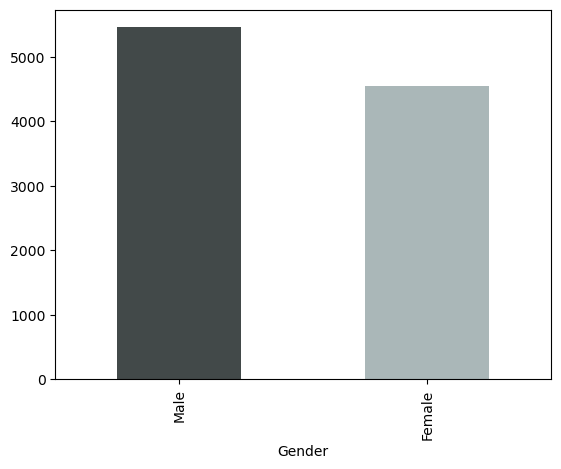

In [690]:
data['Gender'].value_counts().plot(kind='bar',color=['#424949','#AAB7B8'])

### comparison between Geography and Gender

<Axes: xlabel='Gender'>

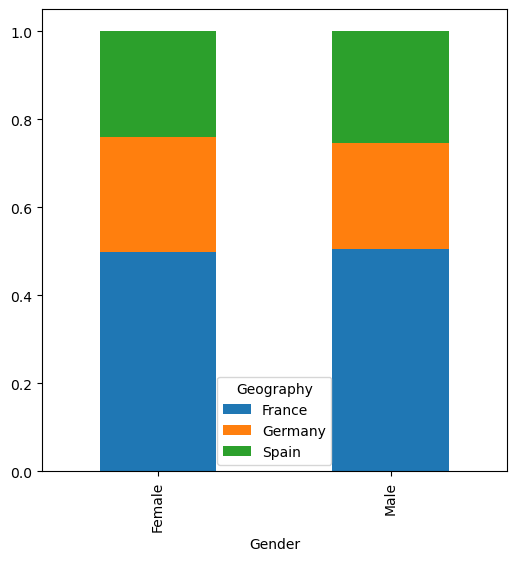

In [691]:
Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

### Distribution of customers by Credict card

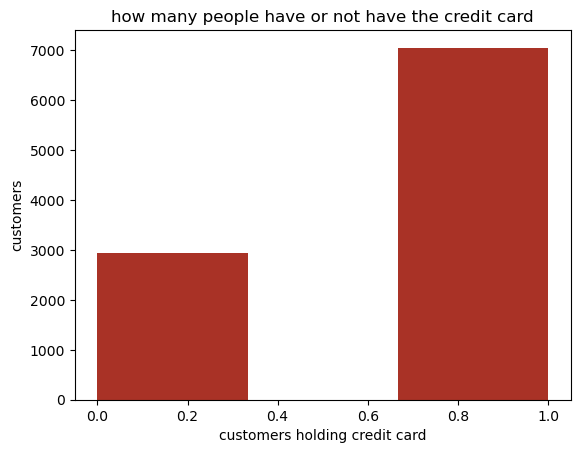

In [692]:
plt.hist(x = data.HasCrCard, bins = 3   , color = '#A93226')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('customers')
plt.show()

### Distribution of Active members

<Axes: xlabel='IsActiveMember'>

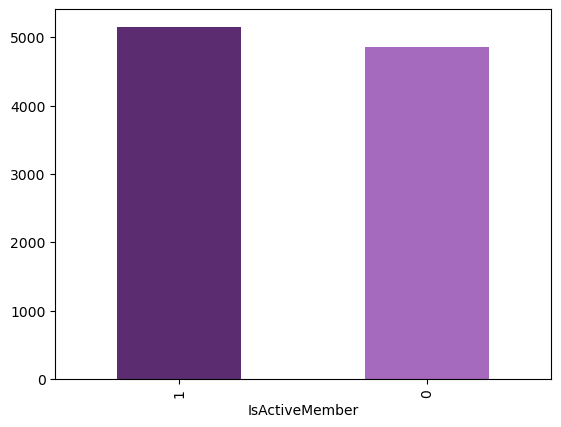

In [693]:
data['IsActiveMember'].value_counts().plot(kind='bar',color=['#5B2C6F','#A569BD'])

### Distribution of customer exit

<Axes: xlabel='Exited'>

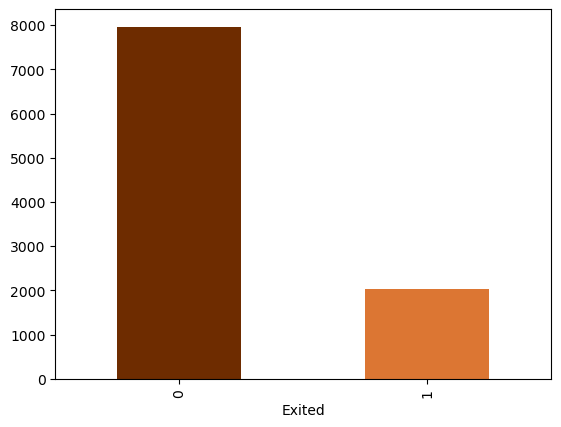

In [694]:
data['Exited'].value_counts().plot(kind='bar',color=['#6E2C00','#DC7633'])

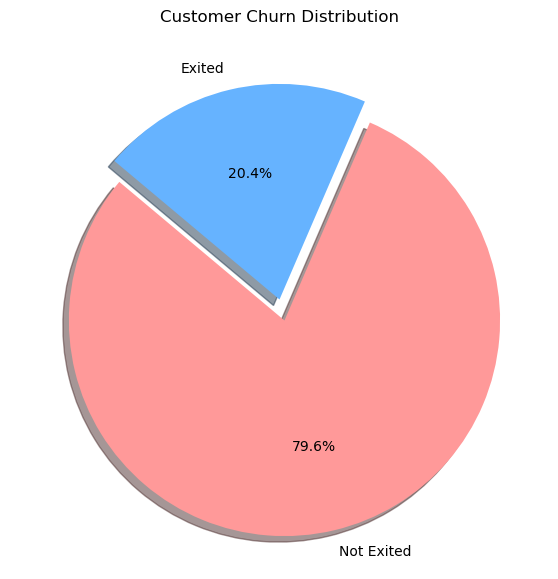

In [783]:
churn_counts = data['Exited'].value_counts()
labels = ['Not Exited', 'Exited']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Customer Churn Distribution')
plt.show()


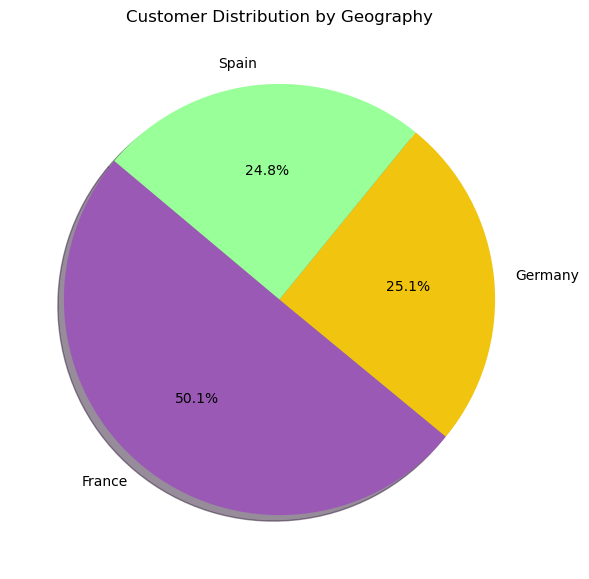

In [788]:
geography_counts = data['Geography'].value_counts()
labels = geography_counts.index
sizes = geography_counts.values
colors = ['#9B59B6','#F1C40F','#99ff99'] 
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Customer Distribution by Geography')
plt.show()


## Separating the categorical Variables and Numerical variables into two different datasets for Data Preparations for Data Analysis.

In [695]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [696]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
categorical

['Surname', 'Geography', 'Gender']

In [697]:
cat_data = data[categorical]

In [698]:
cat_data['RowNumber'] = data['RowNumber']

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_5992\741325881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['RowNumber'] = data['RowNumber']


In [699]:
cat_data.head()

,Surname,Geography,Gender,RowNumber
0,Hargrave,France,Female,1
1,Hill,Spain,Female,2
2,Onio,France,Female,3
3,Boni,France,Female,4
4,Mitchell,Spain,Female,5


In [700]:
cat_data.shape

(10000, 4)

In [701]:
numerical = [var for var in data.columns if data[var].dtype != 'O']

In [702]:
num_data = data[numerical]
num_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [703]:
num_data.shape

(10000, 11)

## Outlier Detection and Treatment 

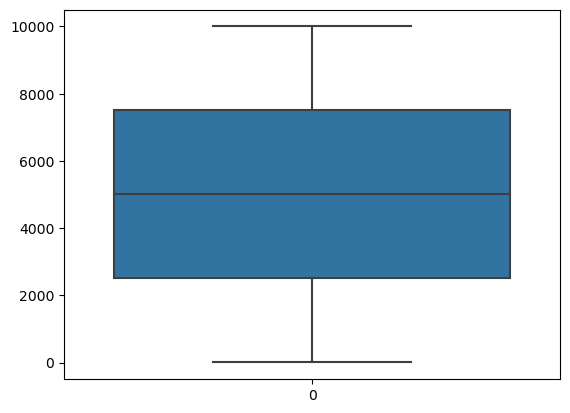

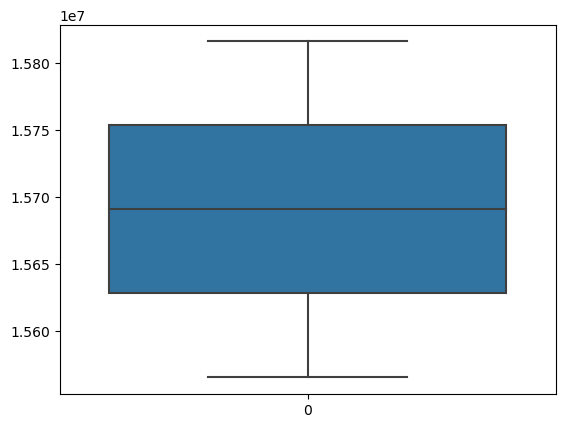

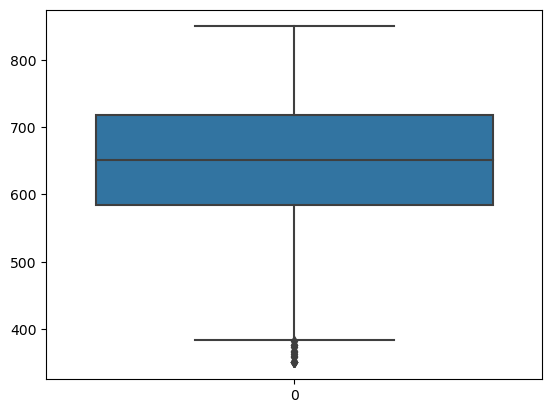

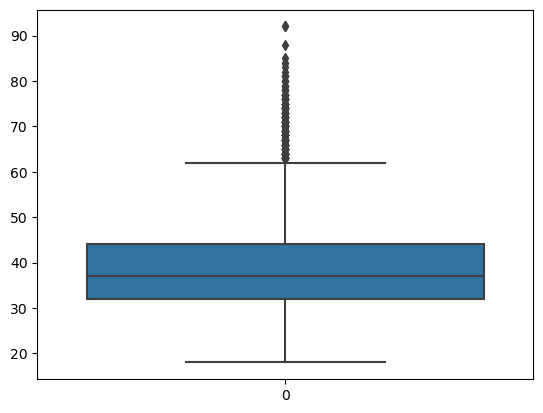

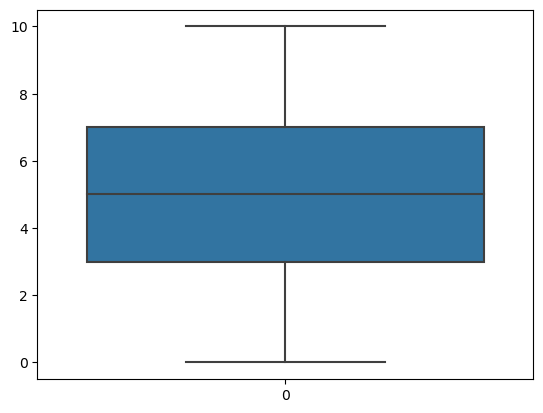

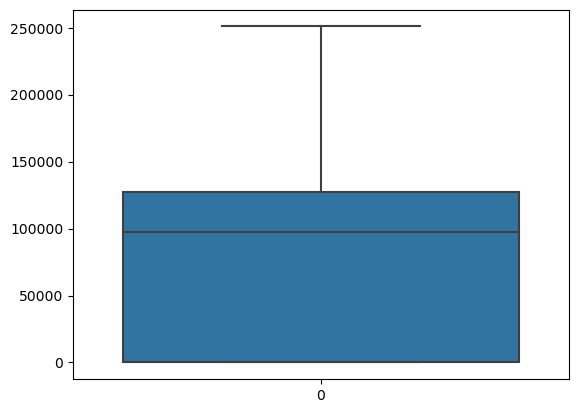

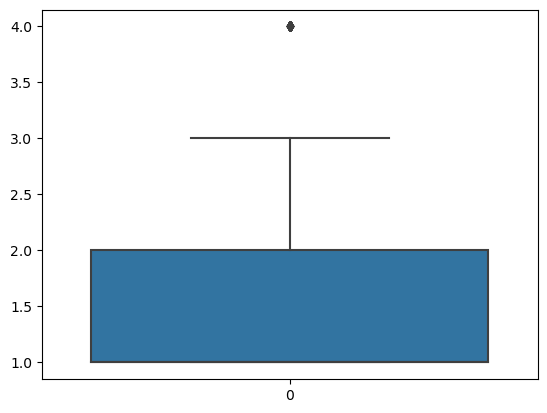

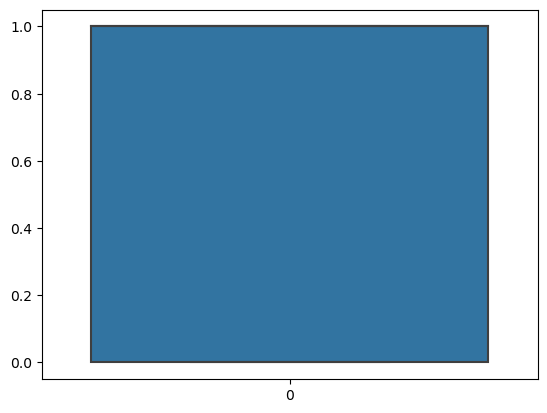

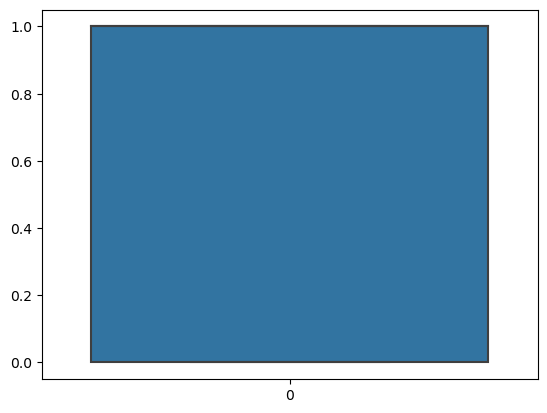

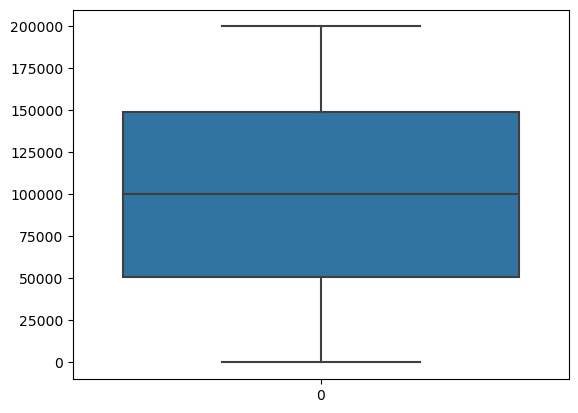

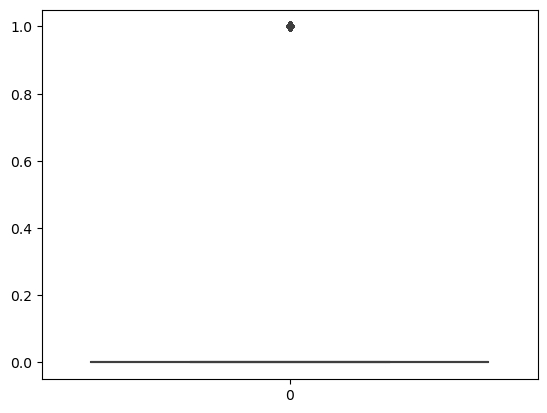

In [704]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

**There is no outliers in the continuos variable. Then no need to do the outlier treatment.**

## Merging the numerical data and the categorical data

In [705]:
Final_Data = pd.merge(num_data,cat_data,how = 'inner', left_on = 'RowNumber', right_on = 'RowNumber')

In [706]:
Final_Data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,Hargrave,France,Female
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Hill,Spain,Female
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Onio,France,Female
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,Boni,France,Female
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Mitchell,Spain,Female


**copy of dataset**

In [707]:
final_data1 = Final_Data.copy()

In [708]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,Hargrave,France,Female
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Hill,Spain,Female
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Onio,France,Female
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,Boni,France,Female
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Mitchell,Spain,Female


In [709]:
final_data1= final_data1.drop(columns = 'Surname')

In [710]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,France,Female
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Spain,Female
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,France,Female
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,France,Female
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Spain,Female


## ONE-HOT ENCODING

In [711]:
cat_data.nunique()

Surname       2917
Geography        3
Gender           2
RowNumber    10000
dtype: int64

In [712]:
cat_data.columns

Index(['Surname', 'Geography', 'Gender', 'RowNumber'], dtype='object')

In [713]:
final_data1 = pd.get_dummies(final_data1,columns = ['Geography', 'Gender'],dtype = int)

In [714]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Feature Engineering

### Correlational Analysis

#### Heat Map

In [715]:
data.select_dtypes(['int','float']).corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

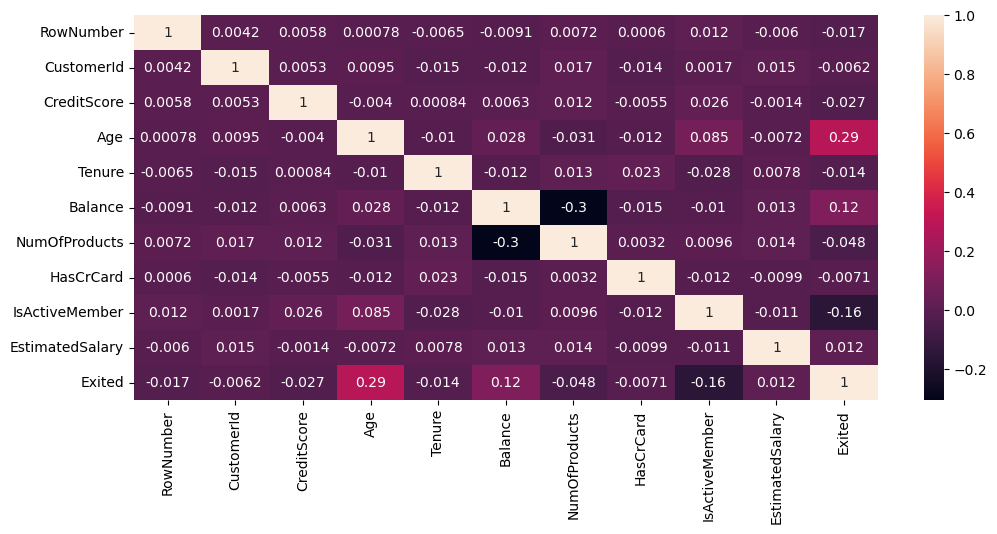

In [716]:
plt.figure(figsize=(12,5))
sns.heatmap(data.select_dtypes(['int','float']).corr(), annot = True)

In [717]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [718]:
corr = final_data1.corrwith(final_data1.IsActiveMember).abs().sort_values(ascending = False)

In [719]:
corr

IsActiveMember       1.000000
Exited               0.156128
Age                  0.085472
Tenure               0.028362
CreditScore          0.025651
Gender_Female        0.022544
Gender_Male          0.022544
Geography_Germany    0.020486
Geography_Spain      0.016732
RowNumber            0.012044
HasCrCard            0.011866
EstimatedSalary      0.011421
Balance              0.010084
NumOfProducts        0.009612
Geography_France     0.003317
CustomerId           0.001665
dtype: float64

In [720]:
p = corr[np.abs(corr)>0.003].index.difference(['IsActiveMember'])
p

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited',
       'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'HasCrCard', 'NumOfProducts', 'RowNumber', 'Tenure'],
      dtype='object')

In [721]:
final_data1 = final_data1.loc[ : : ,['IsActiveMember','Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited','Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany','Geography_Spain', 'HasCrCard', 'NumOfProducts', 'RowNumber', 'Tenure']]

In [722]:
final_data1.head()

,IsActiveMember,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,NumOfProducts,RowNumber,Tenure
0,1,42,0.00,619,101348.88,1,1,0,1,0,0,1,1,1,2
1,1,41,83807.86,608,112542.58,0,1,0,0,0,1,0,1,2,1
2,0,42,159660.80,502,113931.57,1,1,0,1,0,0,1,3,3,8
3,0,39,0.00,699,93826.63,0,1,0,1,0,0,0,2,4,1
4,1,43,125510.82,850,79084.10,0,1,0,0,0,1,1,1,5,2


**Converting the Float data type into Integer data type.**

In [723]:
final_data1['Balance']=final_data1['Balance'].astype(int)

In [724]:
final_data1['NumOfProducts']=final_data1['NumOfProducts'].astype(int)

In [725]:
final_data1['EstimatedSalary']=final_data1['EstimatedSalary'].astype(int)

In [726]:
final_data1.head()

,IsActiveMember,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,NumOfProducts,RowNumber,Tenure
0,1,42,0,619,101348,1,1,0,1,0,0,1,1,1,2
1,1,41,83807,608,112542,0,1,0,0,0,1,0,1,2,1
2,0,42,159660,502,113931,1,1,0,1,0,0,1,3,3,8
3,0,39,0,699,93826,0,1,0,1,0,0,0,2,4,1
4,1,43,125510,850,79084,0,1,0,0,0,1,1,1,5,2


## Splitting the final dataset into Training and Testing dataset

In [727]:
x = final_data1.iloc[:,0:9]
y = final_data1.iloc[:,9]

In [728]:
print(x.shape)
print(y.shape)

(10000, 9)
(10000,)


In [729]:
print(x.columns)

Index(['IsActiveMember', 'Age', 'Balance', 'CreditScore', 'EstimatedSalary',
       'Exited', 'Gender_Female', 'Gender_Male', 'Geography_France'],
      dtype='object')


In [730]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 9)
(7500,)
(2500, 9)
(2500,)


## Modelling

### Logistic Regression

In [731]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [732]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

In [733]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)
y_pred_lr = Logistic_Regression.predict(x_test)

lr_AUROC = roc_auc_score(y_test, y_pred_lr)*100
lr_Acu = accuracy_score(y_test, y_pred_lr)*100
lr_f1 = f1_score(y_test, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(y_test, Logistic_Regression.predict_proba(x_test)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)

AUROC OF Sampled Logistic Regression :  72.9530861921018
F1 SCORE OF Logistic Regression :  0.22722400857449085
Accuracy OF Logistic Regression :  71.16
AUROC OF Logistic Regression :  53.74189520234799


### Decision Tree

In [734]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [735]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale

In [736]:
model = DecisionTreeClassifier() 

In [737]:
model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.8308
[[1626  195]
 [ 228  451]]


### K-Nearest Neighbors Classifier

In [738]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale

In [739]:
sc = StandardScaler()
sc = sc.fit(x_train)

In [740]:
x_train_std = pd.DataFrame(sc.transform(x_train), columns =x_train.columns )

In [741]:
x_test_std = pd.DataFrame(sc.transform(x_test), columns =x_test.columns )

In [742]:
KNeighborsClassifier?

In [743]:
#we don't know parameter values of K and Weights

param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10], 'weights':['uniform', 'distance']}  # Number of combinations = 16

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=True).fit(x_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [744]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [745]:
knn_model.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [746]:
knn_model.best_score_

0.9228607087441333

In [747]:
knn_model_final = KNeighborsClassifier(n_neighbors=10, weights='uniform', n_jobs=-1).fit(x_train_std, y_train)

In [748]:
train_pred_prob = pd.DataFrame(knn_model_final.predict_proba(x_train_std))[1]
test_pred_prob = pd.DataFrame(knn_model_final.predict_proba(x_test_std))[1]

In [749]:
import sklearn.metrics as metrics
print('ROC_AUC_Train:', metrics.roc_auc_score(y_train, train_pred_prob))

ROC_AUC_Train: 0.9497769875001205


In [750]:
print('ROC_AUC_Test:', metrics.roc_auc_score(y_test, test_pred_prob))

ROC_AUC_Test: 0.9202569595918667


In [751]:
train_pred = knn_model_final.predict(x_train_std)
test_pred =knn_model_final.predict(x_test_std)

In [752]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5670
           1       0.72      0.82      0.77      1830

    accuracy                           0.88      7500
   macro avg       0.83      0.86      0.84      7500
weighted avg       0.89      0.88      0.88      7500



### Random Forest Classifier

In [753]:
from sklearn.ensemble import RandomForestClassifier

In [754]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.852
[[1573  248]
 [ 122  557]]


### Naive Bayes

In [762]:
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB()

# fit the model
gnb.fit(x_train,y_train)

GaussianNB()

In [763]:
y_train_pred = gnb.predict(x_train)

In [764]:
y_train_pred = pd.Series(y_train_pred)

In [765]:
Model_data_train = pd.DataFrame(y_train)

In [766]:
Model_data_train['IsActiveMember'] = y_train_pred

In [769]:
Model_data_train['y_pred'] = y_train_pred

In [770]:
Model_data_train

,Geography_Germany,IsActiveMember,y_pred
2967,1,0.0,0.0
700,0,0.0,0.0
3481,0,1.0,1.0
1621,0,0.0,0.0
800,0,0.0,0.0
8942,0,NaN,NaN
3980,0,1.0,1.0
3663,0,0.0,0.0
7878,0,NaN,NaN
2330,0,0.0,0.0


In [771]:
pd.crosstab(Model_data_train.IsActiveMember,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
IsActiveMember,,,
0.0,4011,0,4011
1.0,0,1604,1604
All,4011,1604,5615


In [772]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[4594 1076]
 [ 770 1060]]

True Positives(TP) =  4594

True Negatives(TN) =  1060

False Positives(FP) =  1076

False Negatives(FN) =  770


(2, 2)

<Axes: >

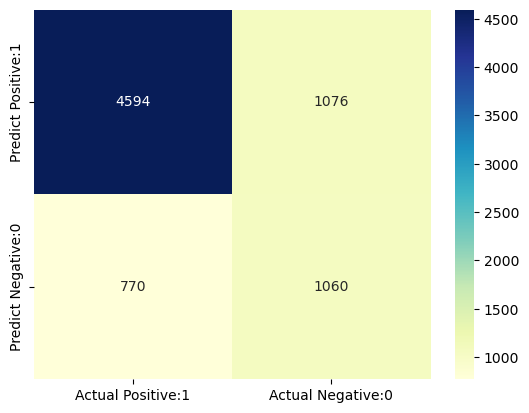

In [773]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [774]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5670
           1       0.50      0.58      0.53      1830

    accuracy                           0.75      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.77      0.75      0.76      7500



In [775]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7539


#### Data Validation on x_test

In [776]:
y_test_pred = gnb.predict(x_test)

In [777]:
y_test_pred = pd.Series(y_test_pred)

In [778]:
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model test accuracy score: 0.7288
